<a href="https://colab.research.google.com/github/hazra-kerubo/A---Dijkstra--Simulated-Annealing-Algorithm/blob/main/Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import matplotlib.pyplot as plt

# Function to minimize
def objective_function(x):
    return x ** 2 + 10 * math.sin(x)

# Simulated Annealing algorithm
def simulated_annealing(objective, bounds, max_iterations, start_temp, alpha):
    current_x = random.uniform(bounds[0], bounds[1])
    current_energy = objective(current_x)
    best_x = current_x
    best_energy = current_energy
    temp = start_temp

    history = [(current_x, current_energy)]

    for i in range(max_iterations):
        candidate_x = current_x + random.uniform(-1, 1)
        if candidate_x < bounds[0] or candidate_x > bounds[1]:
            continue  # skip out of bounds

        candidate_energy = objective(candidate_x)
        delta_energy = candidate_energy - current_energy

        # Accept if better or with a probability if worse
        if delta_energy < 0 or math.exp(-delta_energy / temp) > random.random():
            current_x = candidate_x
            current_energy = candidate_energy
            if current_energy < best_energy:
                best_x = current_x
                best_energy = current_energy

        history.append((current_x, current_energy))
        temp *= alpha  # Cool down

    return best_x, best_energy, history


In [3]:
# Parameters
bounds = [-10, 10]
max_iterations = 1000
start_temp = 100
alpha = 0.98  # Cooling rate

In [4]:
# Run the algorithm
best_x, best_energy, history = simulated_annealing(objective_function, bounds, max_iterations, start_temp, alpha)

In [5]:
# Print results
print(f"Best solution: x = {best_x:.4f}, f(x) = {best_energy:.4f}")


Best solution: x = -1.3097, f(x) = -7.9458


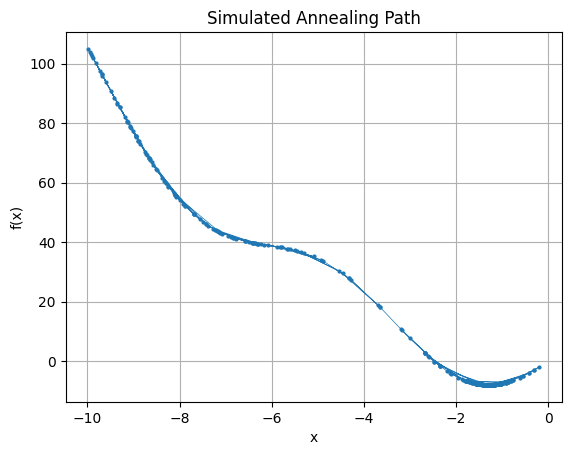

In [6]:
# Visualization
x_vals = [x for x, _ in history]
y_vals = [y for _, y in history]

plt.plot(x_vals, y_vals, marker='o', markersize=2, linestyle='-', linewidth=0.5)
plt.title('Simulated Annealing Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


 Test Function: f(x) = x² (minimum at x = 0)

Best solution: x = 0.0015, f(x) = 0.0000


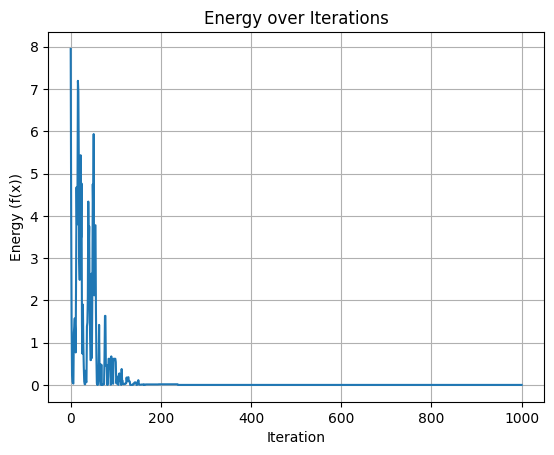

In [8]:
# Simple test function to minimize: f(x) = x²
def test_function(x):
    return x**2

# Test your Simulated Annealing function
if __name__ == "__main__":
    bounds = [-10, 10]                # Search space
    max_iterations = 1000
    start_temp = 100
    alpha = 0.95

    # Run Simulated Annealing
    best_x, best_fx, history = simulated_annealing(test_function, bounds, max_iterations, start_temp, alpha)

    print(f"Best solution: x = {best_x:.4f}, f(x) = {best_fx:.4f}")

    # Optional: Plot energy drop
    import matplotlib.pyplot as plt
    energies = [e for _, e in history]
    plt.plot(energies)
    plt.title("Energy over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Energy (f(x))")
    plt.grid(True)
    plt.show()


Test Function 2 - f(x) = (x - 3)^2 + 4

Best solution: x = 3.0004, f(x) = 4.0000


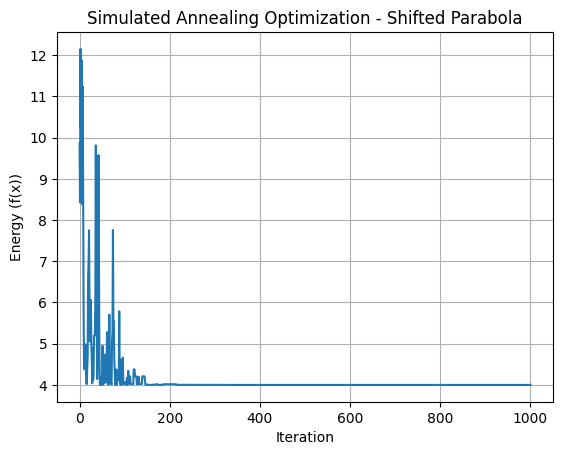

In [9]:
# Test function: f(x) = (x - 3)^2 + 4
def shifted_parabola(x):
    return (x - 3)**2 + 4

# Run Simulated Annealing
if __name__ == "__main__":
    bounds = [-10, 10]                # Search range
    max_iterations = 1000
    start_temp = 100
    alpha = 0.95

    # Simulated Annealing call
    best_x, best_fx, history = simulated_annealing(shifted_parabola, bounds, max_iterations, start_temp, alpha)

    print(f"Best solution: x = {best_x:.4f}, f(x) = {best_fx:.4f}")

    # Plot the energy decline over iterations
    import matplotlib.pyplot as plt
    energies = [e for _, e in history]
    plt.plot(energies)
    plt.title("Simulated Annealing Optimization - Shifted Parabola")
    plt.xlabel("Iteration")
    plt.ylabel("Energy (f(x))")
    plt.grid(True)
    plt.show()


Test function 3 - f(x) = x² * sin(5x)

Best solution: x = 4.7303, f(x) = -22.2861


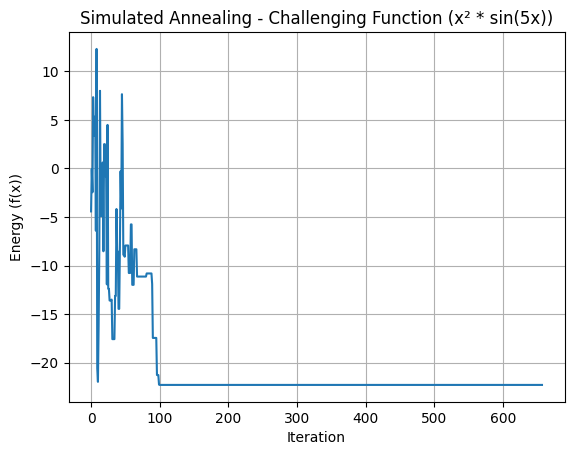

In [10]:
import math

# Challenging function: f(x) = x² * sin(5x)
def tricky_function(x):
    return x**2 * math.sin(5 * x)

# Run Simulated Annealing
if __name__ == "__main__":
    bounds = [-5, 5]                 # Tighter bounds to show the wave pattern
    max_iterations = 1000
    start_temp = 100
    alpha = 0.95

    best_x, best_fx, history = simulated_annealing(tricky_function, bounds, max_iterations, start_temp, alpha)

    print(f"Best solution: x = {best_x:.4f}, f(x) = {best_fx:.4f}")

    # Plot energy over iterations
    import matplotlib.pyplot as plt
    energies = [e for _, e in history]
    plt.plot(energies)
    plt.title("Simulated Annealing - Challenging Function (x² * sin(5x))")
    plt.xlabel("Iteration")
    plt.ylabel("Energy (f(x))")
    plt.grid(True)
    plt.show()


Test Function 4 - Ackley Function - 1D

In [12]:

# Ackley Function (1D): Global minimum at x = 0, f(0) = 0
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * math.pi
    return -a * math.exp(-b * abs(x)) - math.exp(math.cos(c * x)) + a + math.e


Best solution: x = -0.0007, f(x) = 0.002817


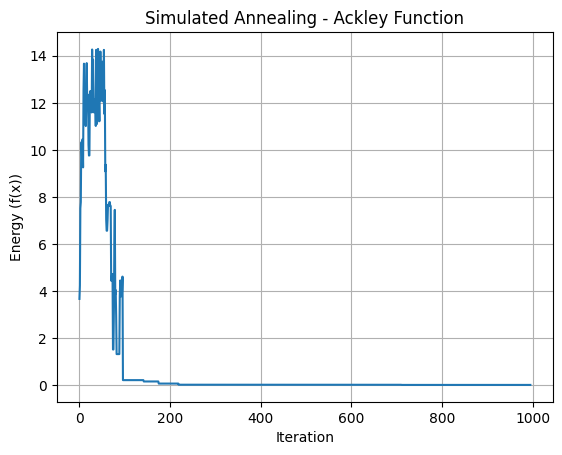

In [13]:
if __name__ == "__main__":
    bounds = [-5, 5]               # Typical bounds for Ackley function
    max_iterations = 1000
    start_temp = 100
    alpha = 0.95

    best_x, best_fx, history = simulated_annealing(ackley, bounds, max_iterations, start_temp, alpha)

    print(f"Best solution: x = {best_x:.4f}, f(x) = {best_fx:.6f}")

    # Plot energy over iterations
    import matplotlib.pyplot as plt
    energies = [e for _, e in history]
    plt.plot(energies)
    plt.title("Simulated Annealing - Ackley Function")
    plt.xlabel("Iteration")
    plt.ylabel("Energy (f(x))")
    plt.grid(True)
    plt.show()



**Conclusion**

* Basic Accuracy: For the simpler test cases (x², (x - 3)² + 4), the algorithm consistently converged to the correct minimum, proving the basic logic is sound.

* Handling Local Minima:
The function x² * sin(5x) introduced many local minima, yet SA was still able to reach a near-optimal solution, thanks to its probabilistic nature and cooling strategy.


**Recommendations**

* Tuning Matters: Continue experimenting with different starting temperatures, cooling rates, and step sizes to fine-tune performance.

* Use Adaptive Cooling: Consider implementing adaptive or logarithmic cooling for better performance on complex functions.

* Visualize More: Graphical outputs of energy over time (or in 2D for more complex functions) help diagnose algorithm behavior.

* Scale to Higher Dimensions: Try 2D or n-dimensional versions to test scalability and real-world feasibility.

* Compare with Alternatives: Benchmark your SA implementation against Gradient Descent, Genetic Algorithms, or even Bayesian Optimization.